In [1]:
import cptac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 1.1.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-d853f64972b6>, line 1)


In [2]:
# Download the colorectal data set
cptac.download(dataset="Colon")

# Load the colon cancer data set
colon = cptac.Colon()

In [3]:
protein_data = colon.get_proteomics() # get the proteomics data

In [4]:
rna_data = colon.get_transcriptomics()

In [5]:
clinical_data = colon.get_clinical()

# convert ages 
clinical_data.loc[:,"Age"] = clinical_data.loc[:, "Age"]/12

In [6]:
name_intersects = [
    np.intersect1d(protein_data.index, rna_data.index), # 0. fill in intersecting for protein/rna here
    np.intersect1d(protein_data.index, clinical_data.index), # 1. fill in intersecting for protein/clinical here
    np.intersect1d(rna_data.index, clinical_data.index), # 2. fill in the intersecting for rna/clinical here
]

In [40]:
# Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(rna_data.columns, protein_data.columns)

# Create the two data frames
rna_shared = rna_data.loc[name_intersects[0], shared_rna_prot]
prot_shared = protein_data.loc[name_intersects[0], shared_rna_prot]

In [41]:
shared_genes = ["APC", "TP53", "TTN", "KRAS", "SYNE1", "MUC16"]
general_top = ["APC", "TP53", "TTN", "KRAS", "MUC16", "SYNE1", "PIK3CA",
               "FAT4","RYR2", "ZFHX4", "OBSCN", "DNAH5", "LRP1B", "PCLO", 
              "ABCA13", "DNAH11", "CSMD3", "FAT3", "CSMD1", "USH2A",
              "NEB", "SPTA1", "TRPS1", "ADGRV1", "KMT2D", "PCLO"]

for i in general_top:
    if i in rna_shared.columns:
        print(i)

TP53
KRAS
SYNE1
PIK3CA


In [42]:
ncomparisons = 4 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
    
rna_data.columns
gene_names = rna_shared.columns[:20] # get the first ncomparisons gene names
gene_names = ["TP53", "KRAS", "SYNE1", "PIK3CA"]

# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)





In [43]:
# create rna by rna heatmap
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(rna_shared[g1], rna_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

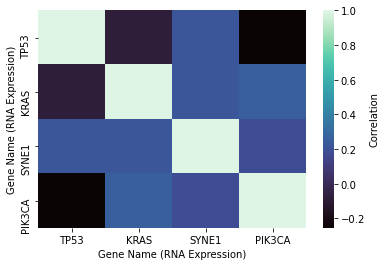

In [44]:
sns.heatmap(
    corr_df,
    cmap='mako',
    cbar_kws={"label": "Correlation"}
)

plt.xlabel('Gene Name (RNA Expression)') 
plt.ylabel('Gene Name (RNA Expression)')
# plt.colorbar
# ax.collections[0].colorbar.set_label("Hello")

plt.savefig("spearman_rna.png")
plt.show()


In [45]:
# create protien by protein heatmap
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(prot_shared[g1], prot_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

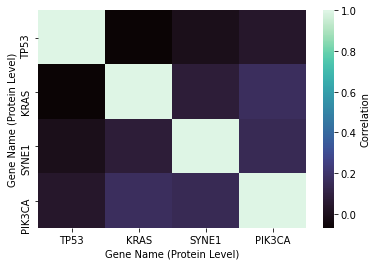

In [46]:
sns.heatmap(
    corr_df,
    cmap='mako',
    cbar_kws={"label": "Correlation"}
)

plt.xlabel('Gene Name (Protein Level)') 
plt.ylabel('Gene Name (Protein Level)')
# plt.colorbar
# ax.collections[0].colorbar.set_label("Hello")

plt.savefig("spearman_protein.png")
plt.show()


In [35]:
# 2. fill in the data frame!
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

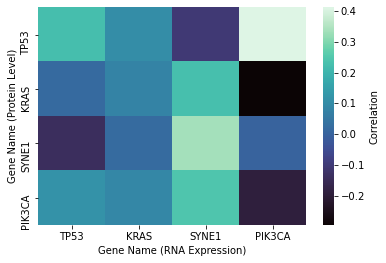

In [38]:
# 3. create the heat map
sns.heatmap(
    corr_df,
    cmap='mako',
    cbar_kws={"label": "Correlation"}
)

plt.xlabel('Gene Name (RNA Expression)') 
plt.ylabel('Gene Name (Protein Level)')
# plt.colorbar
# ax.collections[0].colorbar.set_label("Hello")

plt.savefig("spearman.png")
plt.show()
